In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("C:/Users/KIIT/OneDrive/Desktop/ARIF/KIIT DOCUMENTS/3rd Year/6th semester/TTL Lab/lab 9/winequality-red.csv")
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
!pip install tensorflow
import tensorflow as tf
train_df=df.sample(frac=0.75, random_state=4)
val_df= df.drop(train_df.index)

In [4]:
max_val=train_df.max(axis=0)
min_val=train_df.min(axis=0)
range=max_val - min_val
train_df=(train_df-min_val)/(range)
val_df=(val_df - min_val)/range


In [5]:
X_train = train_df.drop('quality',axis=1)
X_val=val_df.drop('quality',axis=1)
y_train=train_df['quality']
y_val=val_df['quality']
input_shape=[X_train.shape[1]]
input_shape

[11]

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1

In [60]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                         input_shape=input_shape ,
                         kernel_regularizer=l1(0.01) ),
    tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=l1(0.01)),
    tf.keras.layers.Dense(units=1)
])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                768       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='adam',
             loss='mae',
             metrics='accuracy')

In [71]:
losses=model.fit(X_train, y_train, validation_data=(X_val, y_val),
                 batch_size=150,
                 epochs=30,
                )

Epoch 1/30
8/8 [==============================] - 0s 48ms/step - loss: 0.1310 - accuracy: 0.0175 - val_loss: 0.1296 - val_accuracy: 0.0150
Epoch 2/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1299 - accuracy: 0.0175 - val_loss: 0.1302 - val_accuracy: 0.0150
Epoch 3/30
8/8 [==============================] - 0s 11ms/step - loss: 0.1299 - accuracy: 0.0175 - val_loss: 0.1291 - val_accuracy: 0.0150
Epoch 4/30
8/8 [==============================] - 0s 14ms/step - loss: 0.1293 - accuracy: 0.0175 - val_loss: 0.1296 - val_accuracy: 0.0150
Epoch 5/30
8/8 [==============================] - 0s 12ms/step - loss: 0.1299 - accuracy: 0.0175 - val_loss: 0.1287 - val_accuracy: 0.0150
Epoch 6/30
8/8 [==============================] - 0s 13ms/step - loss: 0.1290 - accuracy: 0.0175 - val_loss: 0.1286 - val_accuracy: 0.0150
Epoch 7/30
8/8 [==============================] - 0s 13ms/step - loss: 0.1293 - accuracy: 0.0175 - val_loss: 0.1296 - val_accuracy: 0.0150
Epoch 8/30
8/8 [===========

1/1 [==============================] - 0s 37ms/step
<class 'dict'>


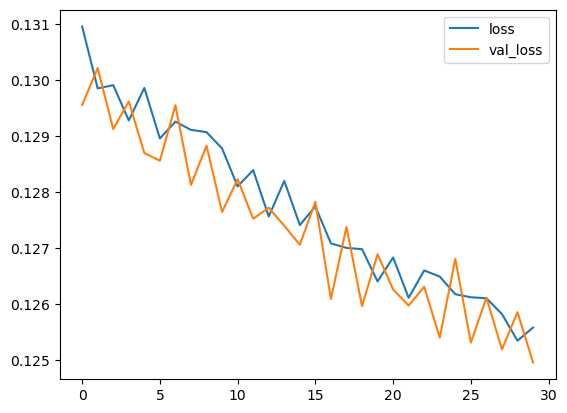

In [72]:
X_val.iloc[121:124,:]
y_val.iloc[121:124]
model.predict(X_val.iloc[121:124,:])
loss_df=pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()
print(type(losses.history))
